# US Housing: Sale vs Assessed Value - Linear Regression Model

## Imports
This section of code imports the required libraries for this linear regression model.

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Pre-process data
Firstly we want to preprocess the data. We do this by importing the CSV file containing the data. The data for this project can be obtained [here](https://catalog.data.gov/dataset/real-estate-sales-2001-2018). Once the data has been downloaded we need to clean it. The first thing we do is ensure that the `Sale Amount`, `Assessed Value` and `List Year` columns all contain only numeric data. After this we filter the properties so that we only see entries that are residential and single family. After this we drop any rows in the `OPM remarks` column that contains the phrase "INCORRECT SALE AMOUNT" as it will cause incorrect data to be entered. Next we drop all rows in the `Sale Amount`, `Assessed Value` and `List Year` columns that contain a NaN value. Finally we filter the `Sale Amount` and `Assessed Value` columns so that we only see real estate that has a value between $100,000 and $419,300 as this filters the data to be within the [median sale price of a house in America in 2024](https://fred.stlouisfed.org/series/MSPUS).

In [44]:
df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')

df['Sale Amount'] = pd.to_numeric(df['Sale Amount'], errors='coerce')
df['List Year'] = pd.to_numeric(df['List Year'], errors='coerce')

print(df['List Year'].min(), df['List Year'].max())
df = df[df['Property Type'].str.contains("Residential", na=False)]
df = df[df['Residential Type'].str.contains("Single Family", na=False)]
df = df[df['Town'].str.contains("Washington", na=False)]


df = df[~df['OPM remarks'].str.contains('INCORRECT SALE AMOUNT', na=False)]

df = df.dropna(subset=['Sale Amount', 'List Year', 'Assessed Value'])

df = df[(df['Sale Amount'] >= 100000) & (df['Assessed Value'] >= 100000)]
df = df[(df['Sale Amount'] <= 419300) & (df['Assessed Value'] <= 419300)]

print(df.count())



C:\Users\VitoF\AppData\Local\Temp\ipykernel_22532\3728004744.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')


2001 2022
Serial Number       46
List Year           46
Date Recorded       46
Town                46
Address             46
Assessed Value      46
Sale Amount         46
Sales Ratio         46
Property Type       46
Residential Type    46
Non Use Code        26
Assessor Remarks    23
OPM remarks          4
Location            33
dtype: int64


## Fit Data to Model
In this section we fit our data to our linear regression models. We use two models to predict both the `Sale Amount` and `Assessed Value` seperately, as we are trying to predict the sale price of a residential property for a given year and then use that predicted sale price to estimate what the assessed value of the property would be. Firstly, we get the independant (what we're using to predict the outcome) and dependant (what we are trying to predict) variables (`List Year` and `Sale Amount` respectively). After this we initialise the first model and fit our variables to the model, using our independant and dependant variables. Following this, we fit our second model using `Sale Amount` as our independant value and the `Assessed Value` as our dependant value.

In [45]:
X_year = df[['List Year']]  # Independent variable
y_sale = df['Sale Amount']  # Dependent variable

year_sale_model = LinearRegression() # Initialise model
year_sale_model.fit(X_year, y_sale) # Fit values to the model

X_sale = df[['Sale Amount']]
y_assessed = df['Assessed Value']

sale_assessed_model = LinearRegression()
sale_assessed_model.fit(X_sale, y_assessed)

LinearRegression()

## Predictions
After we fit the data to our models, we use that data to predict our future values.

In [46]:
# Function to predict Sale Amount and Assessed Value for a given year
def predict_for_year(year):
    # Ensure that the input is passed as a DataFrame with the correct column name 'List Year'
    year_input = pd.DataFrame([[year]], columns=['List Year'])
    
    # Predict Sale Amount based on the year
    predicted_sale_amount = year_sale_model.predict(year_input)[0]
    
    # Now predict Assessed Value based on the predicted Sale Amount
    # Again, we need to ensure it's passed as a DataFrame with the correct column name 'Sale Amount'
    sale_input = pd.DataFrame([[predicted_sale_amount]], columns=['Sale Amount'])
    predicted_assessed_value = sale_assessed_model.predict(sale_input)[0]
    
    return predicted_sale_amount, predicted_assessed_value

# Take user input for the year
year_input = 0

# Loop until a valid year is entered (greater than 2022)
while year_input < 2022 or year_input > 2050:
    try:
        # Get user input and convert to integer
        year_input = int(input("Enter the year you want to predict sales for (2022 - 2050): "))
        
        # Check if the input year is valid
        if year_input < 2022:
            # Raise an IOError if the year is less than or equal to 2022
            raise IOError('Year must be greater than 2022')
        
        if year_input > 2050:
            # Raise an IOError if the year is less than or equal to 2022
            raise IOError('Year must 2050 or less')
    
    except IOError as e:
        # Print the error message and prompt the user to try again
        print(f"Error: {e}. Please try again.\n")
    
    except ValueError:
        # Handle the case where the input is not a valid integer
        print("Invalid input. Please enter a valid year.")

# Once a valid year is entered, proceed with the prediction
print(f"Valid year entered: {year_input}. Proceeding with predictions...")
# Call your prediction function here (e.g., predict_for_year(year_input))

# Predict Sale Amount and Assessed Value for the entered year
predicted_sale, predicted_assessed = predict_for_year(year_input)

# Print results
print(f"Predicted Sale Amount for {year_input}: ${predicted_sale:,.2f}")
print(f"Predicted Assessed Value for {year_input}: ${predicted_assessed:,.2f}")

Valid year entered: 2030. Proceeding with predictions...
Predicted Sale Amount for 2030: $301,395.74
Predicted Assessed Value for 2030: $203,991.40


# Plotting
In this final section we plot our two dependant values against each other to get 

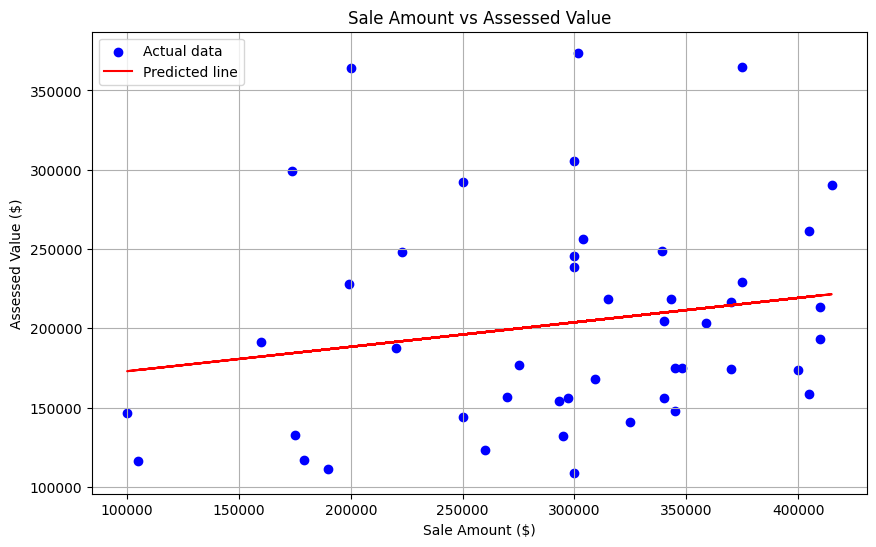

In [47]:
# 1. Visualize Sale Amount vs Assessed Value with a regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(df['Sale Amount'], df['Assessed Value'], color='blue', label='Actual data')

# Generate the values for the regression line using the model
predicted_assessed_values = sale_assessed_model.predict(X_sale)

# Plot the regression line (Sale Amount vs Predicted Assessed Value)
plt.plot(df['Sale Amount'], predicted_assessed_values, color='red', label='Predicted line')

plt.title('Sale Amount vs Assessed Value')
plt.xlabel('Sale Amount ($)')
plt.ylabel('Assessed Value ($)')
plt.legend()
plt.grid(True)
plt.show()
